In [25]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint


In [26]:
df = pd.read_csv("./data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [27]:
df.head(2)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN


In [28]:
def get_first_author_affilation(x):
  try:
    x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [29]:
df['First_author_Country']

0      None
1      None
2      None
3      None
4      None
       ... 
565    None
566    None
567    None
568    None
569    None
Name: First_author_Country, Length: 561, dtype: object

<Axes: >

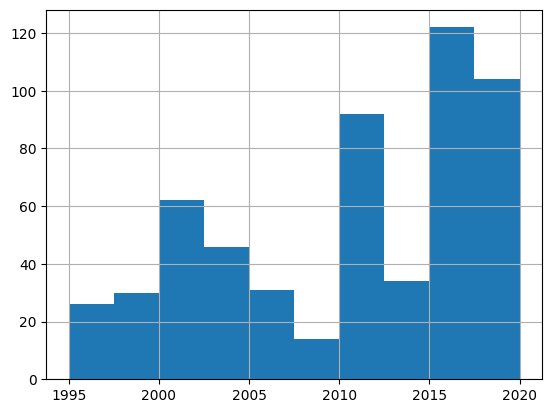

In [30]:
df.Year.hist()

In [31]:
df["Source title"].value_counts().reset_index()


,Source title,count
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [32]:
df = df.fillna(0)


In [33]:
df['Year'].max()

2020

In [34]:
G = nx.Graph()

In [35]:
authors_info = []  # List to store author information

for _, row in df.iterrows():
    current_paper = row['EID']
    if ";" in row['Author(s) ID']:
        authors = row['Author(s) ID'][:-1].split(";")
    else:
        authors = [row['Author(s) ID']]

    publication_info = {
        "Title": row['Title'],
        "Year": row['Year'],
        "Citations": row['Cited by'],
        "Publisher": row['Publisher'],
        "Country":row['Authors with affiliations'].split(";")[0].split(",")[-1].strip()
    }

    for author in authors:
        # Check if the author already exists in authors_info
        author_exists = False
        for author_info in authors_info:
            if author_info[0] == author:
                author_exists = True
                author_info[1]['publications'].append({current_paper: publication_info})
                break

        if not author_exists:
            # If the author doesn't exist, add them to authors_info
            authors_info.append((author, {'publications': [{current_paper: publication_info}]}))


In [36]:
# nodes = []
# for row in df.iterrows():
#   nodes.append((row[1]['EID'],{
#       "Title": row[1]['Title'],
#       "Year" : row[1]['Year'],
#       "Citations" : row[1]['Cited by'],
#       "Publisher" : row[1]['Publisher'],
#   }))
  

In [37]:
nodes = authors_info
len(nodes)

1552

In [38]:
nodes[1]

('53984550800',
 {'publications': [{'2-s2.0-85086464158': {'Title': 'Virtual reality applications for the built environment: Research trends and opportunities',
     'Year': 2020,
     'Citations': 0.0,
     'Publisher': 'Elsevier B.V.',
     'Country': 'Canada'}},
   {'2-s2.0-85060755230': {'Title': 'Building information modelling for off-site construction: Review and future directions',
     'Year': 2019,
     'Citations': 19.0,
     'Publisher': 'Elsevier B.V.',
     'Country': 'Canada'}}]})

In [39]:
G.add_nodes_from(authors_info)


In [40]:
# edges = []
# for row in df.iterrows():
#   current_paper = row[1]['EID']
#   if ";" in row[1]['Author(s) ID']:
#     authors = row[1]['Author(s) ID'][:-1].split(";")
#     for author in authors:
#       papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
#       if len(papers)>0:
#         for paper in papers:
#           if paper != current_paper:
#             edges.append((current_paper,paper))
#   else:
#     continue

In [41]:
edges = []

# Iterate through authors_info to find common publications and create edges
for i in range(len(authors_info)):
    author_id_1, data_1 = authors_info[i]
    publications_1 = data_1['publications']
    
    for j in range(i + 1, len(authors_info)):
        author_id_2, data_2 = authors_info[j]
        publications_2 = data_2['publications']
        
        # Check for common publications
        common_publications = [
            pub_1 for pub_1 in publications_1 for pub_2 in publications_2
            if pub_1.keys() == pub_2.keys()
        ]
        
        # If there are common publications, add the edge to the edges list
        if common_publications:
            edges.append((author_id_1, author_id_2))
edges
    

[('57202536919', '53984550800'),
 ('57202536919', '57215426514'),
 ('57202536919', '6603541102'),
 ('53984550800', '57215426514'),
 ('53984550800', '6603541102'),
 ('53984550800', '57204697057'),
 ('53984550800', '55642611800'),
 ('57215426514', '6603541102'),
 ('6603541102', '57204697057'),
 ('6603541102', '55642611800'),
 ('23398572100', '57191836654'),
 ('23398572100', '8216952800'),
 ('57205293410', '56421700900'),
 ('57205293410', '24831175200'),
 ('57205293410', '36195159400'),
 ('57205293410', '6507346536'),
 ('57205293410', '6602981892'),
 ('56421700900', '24831175200'),
 ('56421700900', '36195159400'),
 ('56421700900', '6507346536'),
 ('56421700900', '6602981892'),
 ('24831175200', '36195159400'),
 ('24831175200', '6507346536'),
 ('24831175200', '6602981892'),
 ('36195159400', '6507346536'),
 ('36195159400', '6602981892'),
 ('6507346536', '6602981892'),
 ('6602981892', '23011507600'),
 ('6602981892', '7006048859'),
 ('57201502480', '57171240600'),
 ('57201502480', '35373203100

In [42]:
G.add_edges_from(edges)

In [43]:
pos = nx.drawing.circular_layout(G)
#pos = nx.spring_layout(G)

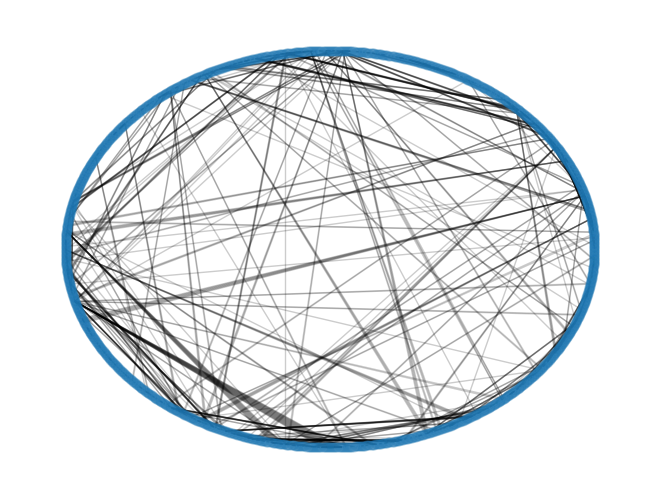

In [44]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [45]:
from networkx.readwrite import json_graph

In [46]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [47]:
nx.write_gml(G,"network.gml")

NetworkXError: '2-s2.0-85086464158' is not a valid key